# AdaBoost Classifier
After testing different values for each parameter, we identified the best configuration:
- `learning_rate`: The best results were recorded between learning rate of 0.85 and 0.95.
- `n_estimators`: For optimal performance, the value should be between 19 and 36.
- `random_state`: Does not impact the results.

## Results
After testing various parameters combinations, the AdaBoostClassifier model achieved a maximum accuracy of `0.785`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [2]:
# load data
data = pd.read_csv("../../Titanic_dataset/train_data.csv")
data_labels = pd.read_csv("../../Titanic_dataset/train_data_labels.csv")
test = pd.read_csv("../../Titanic_dataset/train_test.csv")
test_labels = pd.read_csv("../../Titanic_dataset/train_test_labels.csv")

print("Data shape:", data.shape)
print("Data labels shape:", data_labels.shape)
print("Test shape:", test.shape)
print("Test labels shape:", test_labels.shape)

Data shape: (784, 3)
Data labels shape: (784, 1)
Test shape: (107, 3)
Test labels shape: (107, 1)


In [3]:
# convert data to 1D arrays
data_labels = data_labels.values.ravel()
test_labels = test_labels.values.ravel()

In [4]:
# Learning rate tuning for AdaBoostClassifier
learning_rate_range = np.arange(0.5, 2, 0.001)

results_learning_rate = []
maximum = 0.0
for learning_rate in learning_rate_range:
    clf = AdaBoostClassifier(random_state = 50, learning_rate=learning_rate, n_estimators=50)
    clf.fit(data, data_labels)  # train
    test_predictions = clf.predict(test)  # test
    acc = accuracy_score(test_labels, test_predictions)  # accuracy
    results_learning_rate.append((learning_rate, acc))
    maximum = max(maximum, float(acc))

print(f"Maximum accuracy: {maximum:.3f}")

Maximum accuracy: 0.785


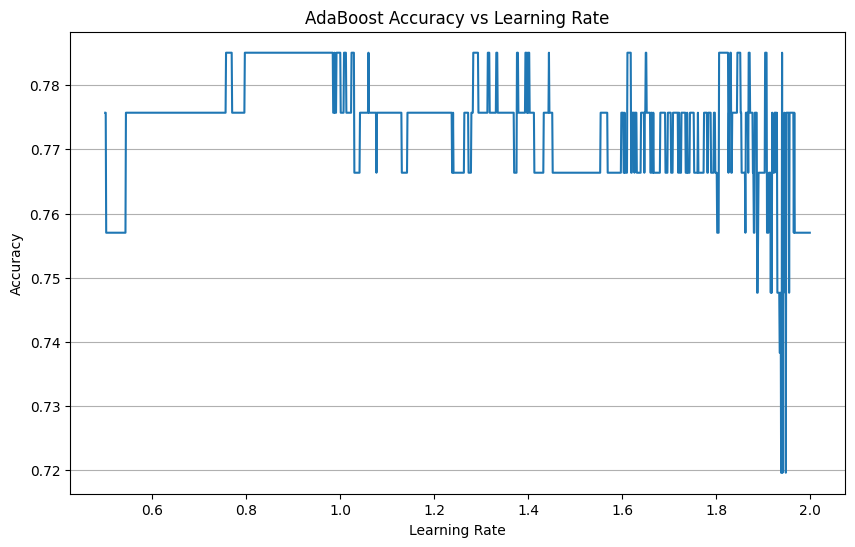

In [5]:
learning_rates = [float(lr) for lr, acc in results_learning_rate]
accuracies = [acc for lr, acc in results_learning_rate]

plt.figure(figsize=(10, 6))
plt.plot(learning_rates, accuracies, linestyle='-')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('AdaBoost Accuracy vs Learning Rate')
plt.grid(axis='y')
plt.savefig("../results/AdaBoost_Learning_Rate.png")
plt.show()

In [6]:
# Random state tuning for AdaBoostClassifier
random_state_range = range(0, 100, 1)

results_random_state = []
maximum = 0.0
for random_state in random_state_range:
    clf = AdaBoostClassifier(random_state=random_state, learning_rate=0.9, n_estimators=31)
    clf.fit(data, data_labels)  # train
    test_predictions = clf.predict(test)  # test
    acc = accuracy_score(test_labels, test_predictions)  # accuracy
    results_random_state.append((random_state, acc))
    maximum = max(maximum, float(acc))

print(f"Maximum accuracy: {maximum:.3f}")

Maximum accuracy: 0.785


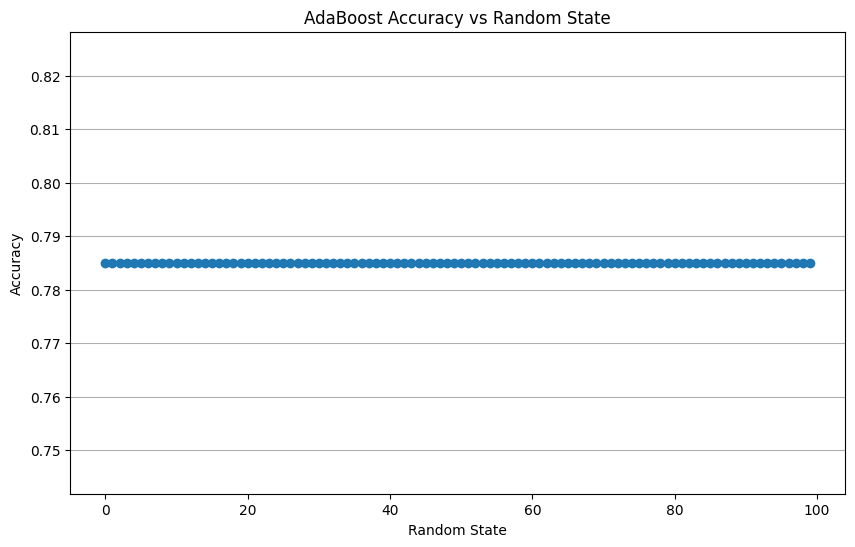

In [7]:
random_states = [float(rs) for rs, acc in results_random_state]
accuracies = [acc for rs, acc in results_random_state]

plt.figure(figsize=(10, 6))
plt.plot(random_states, accuracies, marker='o')
plt.title("AdaBoost Accuracy vs Random State")
plt.xlabel("Random State")
plt.ylabel("Accuracy")
plt.grid(axis='y')
plt.savefig("../results/AdaBoost_Random_State.png")
plt.show()

In [8]:
# N_Estimators tuning for AdaBoostClassifier
n_estimators_range = np.arange(15, 51, 1)
learning_rate_range_2 = np.arange(0.8, 1.1, 0.01)

results_n_estimators = []
maximum = 0.0

for n_estimators in n_estimators_range:
    results_n_estimators.append([])
    for learning_rate in learning_rate_range_2:
        clf = AdaBoostClassifier(random_state=50, learning_rate=learning_rate, n_estimators=n_estimators)
        clf.fit(data, data_labels)
        test_predictions = clf.predict(test)
        acc = accuracy_score(test_labels, test_predictions)
        results_n_estimators[-1].append(acc)
        maximum = max(maximum, float(acc))

print(f"Maximum accuracy: {maximum:.3f}")

Maximum accuracy: 0.785


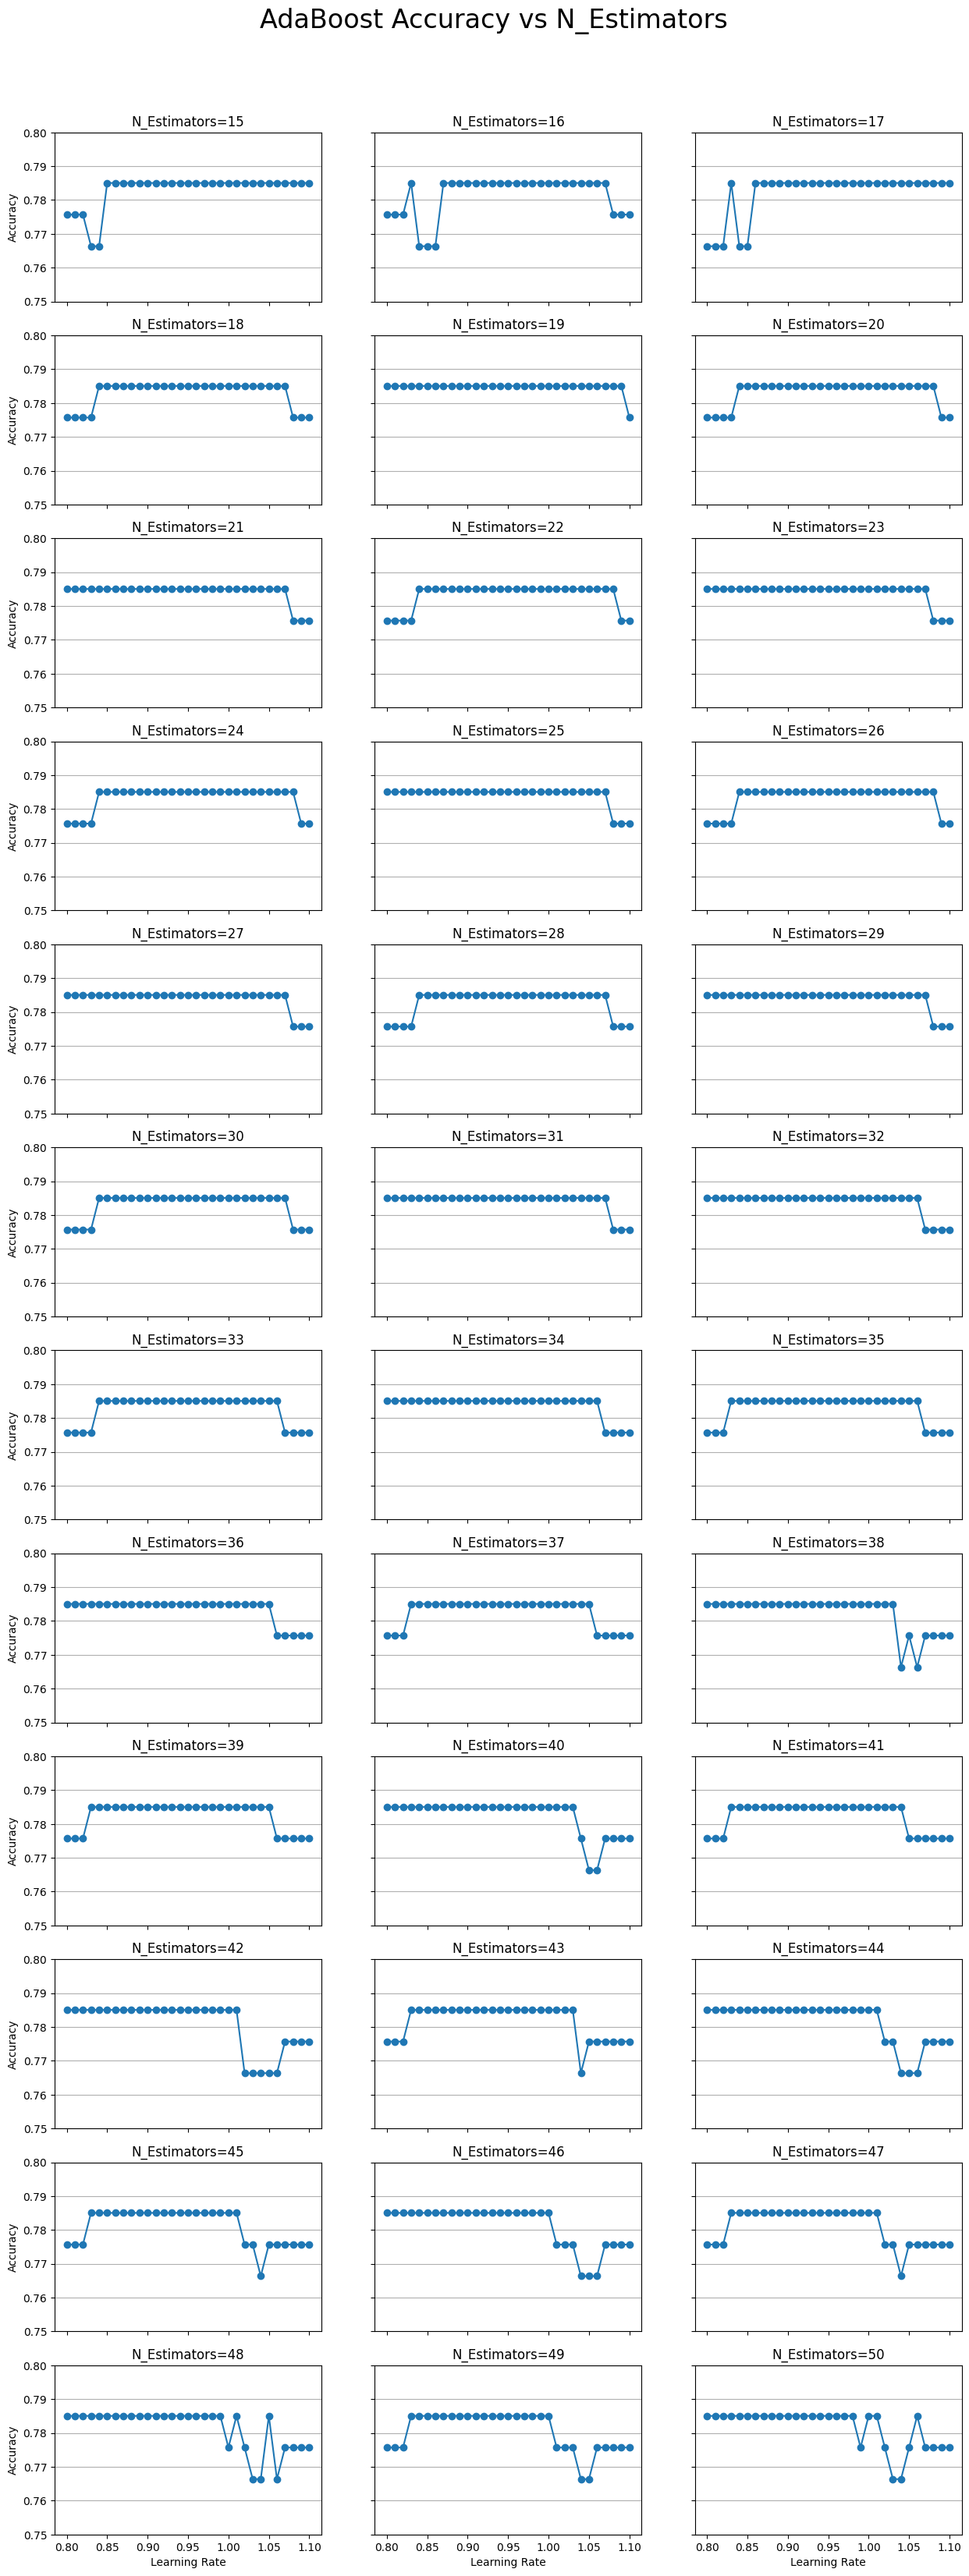

In [9]:
fig, axes = plt.subplots((len(n_estimators_range) + 2) // 3, 3, figsize=(15, 40))
plt.suptitle("AdaBoost Accuracy vs N_Estimators", fontsize=24, y=0.92)

for idx in range(len(n_estimators_range)):
    axes[idx // 3, idx % 3].plot(learning_rate_range_2, results_n_estimators[idx], marker='o')
    axes[idx // 3, idx % 3].set_title(f"N_Estimators={n_estimators_range[idx]}")
    axes[idx // 3, idx % 3].set_ylim(0.75, 0.8)
    axes[idx // 3, idx % 3].grid(axis='y')
    if idx % 3 == 0:
        axes[idx // 3, idx % 3].set_ylabel("Accuracy")
    else:
        axes[idx // 3, idx % 3].set_yticklabels([])
    if idx >= len(n_estimators_range) - 3:
        axes[idx // 3, idx % 3].set_xlabel("Learning Rate")
    else:
        axes[idx // 3, idx % 3].set_xticklabels([])

plt.savefig("../results/AdaBoost_N_Estimators.png")
plt.show()